# Read and clean excel files with draftee NBA and combine stats

Import necessary packages

In [4]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
import time
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

Read csv with draft combine data to df and drop empty column

In [5]:
combine_df = pd.read_csv('nba_draft_combine.csv')
combine_df.drop(columns='Unnamed: 0',inplace=True)
combine_df.head()

,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,Blake Griffin,2009,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,NaN,NaN,22.0,10.95,3.28
1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,NaN,NaN,9.0,11.15,3.18
2,Gerald Henderson,2009,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,NaN,NaN,8.0,11.17,3.14
3,Tyler Hansbrough,2009,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,NaN,NaN,18.0,11.12,3.27
4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,NaN,NaN,5.0,11.17,3.35


Change name of misnamed player in draft combine dataframe

In [6]:
combine_df.loc[combine_df[combine_df['Player']=='JaJuan Johnson (Purdue)'].index,'Player'] = 'JaJuan Johnson'
combine_df[combine_df['Player']=='JaJuan Johnson']

,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
113,JaJuan Johnson,2011,27.0,81.0,82.0,86.0,107.5,38.0,145.5,33.5,141.0,220.0,7.5,9.0,10.0,15.0,11.21,3.14


Read csvs with each draft class' nba stats to dfs and concatenate all classes into a single df 

In [7]:
nba_stats_2009 = pd.read_csv('nba_stats_2009.csv')
nba_stats_2009.drop(60,inplace=True)
nba_stats_2009['Year']=2009
nba_stats_2010 = pd.read_csv('nba_stats_2010.csv')
nba_stats_2010.drop(60,inplace=True)
nba_stats_2010['Year']=2010
nba_stats_2011 = pd.read_csv('nba_stats_2011.csv')
nba_stats_2011.drop(60,inplace=True)
nba_stats_2011['Year']=2011
nba_stats_2012 = pd.read_csv('nba_stats_2012.csv')
nba_stats_2012.drop(60,inplace=True)
nba_stats_2012['Year']=2012
nba_stats_2013 = pd.read_csv('nba_stats_2013.csv')
nba_stats_2013.drop(60,inplace=True)
nba_stats_2013['Year']=2013
nba_stats_2014 = pd.read_csv('nba_stats_2014.csv')
nba_stats_2014.drop(60,inplace=True)
nba_stats_2014['Year']=2014
nba_stats_2015 = pd.read_csv('nba_stats_2015.csv')
nba_stats_2015.drop(60,inplace=True)
nba_stats_2015['Year']=2015
nba_stats_2016 = pd.read_csv('nba_stats_2016.csv')
nba_stats_2016.drop(60,inplace=True)
nba_stats_2016['Year']=2016
nba_stats_2017 = pd.read_csv('nba_stats_2017.csv')
nba_stats_2017.drop(60,inplace=True)
nba_stats_2017['Year']=2017
nba_df = pd.concat([nba_stats_2009,nba_stats_2010,nba_stats_2011,nba_stats_2012,nba_stats_2013,nba_stats_2014,
                   nba_stats_2015,nba_stats_2016,nba_stats_2017],axis=0)
nba_df.drop('Rk',axis=1,inplace=True)
print(nba_df.columns)
nba_df.head()

Index(['Pk', 'Tm', 'Player', 'College', 'Yrs', 'G', 'MP', 'PTS', 'TRB', 'AST',
       'FG%', '3P%', 'FT%', 'MP.1', 'PTS.1', 'TRB.1', 'AST.1', 'WS', 'WS/48',
       'BPM', 'VORP', 'Year'],
      dtype='object')


,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,AST,...,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP,Year
0,1.0,LAC,Blake Griffin,Oklahoma,10.0,622.0,21671.0,13479.0,5501.0,2749.0,...,0.694,34.8,21.7,8.8,4.4,75.2,0.167,3.8,31.9,2009
1,2.0,MEM,Hasheem Thabeet,UConn,5.0,224.0,2357.0,483.0,595.0,27.0,...,0.578,10.5,2.2,2.7,0.1,4.8,0.099,-2.7,-0.4,2009
2,3.0,OKC,James Harden,Arizona State,11.0,826.0,28347.0,20723.0,4388.0,5193.0,...,0.858,34.3,25.1,5.3,6.3,133.3,0.226,6.9,63.6,2009
3,4.0,SAC,Tyreke Evans,Memphis,10.0,594.0,18242.0,9347.0,2720.0,2852.0,...,0.757,30.7,15.7,4.6,4.8,28.4,0.075,0.8,13.1,2009
4,5.0,MIN,Ricky Rubio,NaN,9.0,555.0,17172.0,6269.0,2357.0,4324.0,...,0.840,30.9,11.3,4.2,7.8,36.4,0.102,0.9,12.6,2009


Define function for determining the y variable class for each datapoint and use to create y variable column, Rotation.

In [8]:
def rotation_player(row):
    rotation_player = 0
    if row['PTS.1']>9 and row['G']>100:
        rotation_player = 1
    return rotation_player
        

nba_df['Rotation'] = nba_df.apply(rotation_player, axis=1)
nba_df.head()

,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,AST,...,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP,Year,Rotation
0,1.0,LAC,Blake Griffin,Oklahoma,10.0,622.0,21671.0,13479.0,5501.0,2749.0,...,34.8,21.7,8.8,4.4,75.2,0.167,3.8,31.9,2009,1
1,2.0,MEM,Hasheem Thabeet,UConn,5.0,224.0,2357.0,483.0,595.0,27.0,...,10.5,2.2,2.7,0.1,4.8,0.099,-2.7,-0.4,2009,0
2,3.0,OKC,James Harden,Arizona State,11.0,826.0,28347.0,20723.0,4388.0,5193.0,...,34.3,25.1,5.3,6.3,133.3,0.226,6.9,63.6,2009,1
3,4.0,SAC,Tyreke Evans,Memphis,10.0,594.0,18242.0,9347.0,2720.0,2852.0,...,30.7,15.7,4.6,4.8,28.4,0.075,0.8,13.1,2009,1
4,5.0,MIN,Ricky Rubio,NaN,9.0,555.0,17172.0,6269.0,2357.0,4324.0,...,30.9,11.3,4.2,7.8,36.4,0.102,0.9,12.6,2009,1


Calculate proportion of datapoints in positive class

In [9]:
nba_df['Rotation'].mean()

0.2574074074074074

# Scrape draftee college stats and clean resulting df

Generate list of urls to be scraped from player list and manually update urls that deviate from main format

In [10]:
players = list(combine_df[combine_df['Draft pick']>0]['Player'].values)
urls = []
for player in players:
    player = player.replace(' ','-').lower()
    player = player.replace('.','')
    url = 'https://www.sports-reference.com/cbb/players/{}-1.html'.format(player)
    urls.append(url)
urls = ['https://www.sports-reference.com/cbb/players/glen-rice-jr-1.html' if x == 'https://www.sports-reference.com/cbb/players/glen-rice-1.html' else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/glenn-robinson-2.html' if x == 'https://www.sports-reference.com/cbb/players/glenn-robinson-1.html' else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/gerald-henderson-2.html' if x == 'https://www.sports-reference.com/cbb/players/gerald-henderson-1.html' else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/larry-nance-2.html' if x == 'https://www.sports-reference.com/cbb/players/larry-nance-1.html' else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/jeffery-taylor-1.html'if x == 'https://www.sports-reference.com/cbb/players/jeff-taylor-1.html' else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/bj-mullens-1.html' if x == 'https://www.sports-reference.com/cbb/players/byron-mullens-1.html' else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/etwaun-moore-1.html' if x == "https://www.sports-reference.com/cbb/players/e'twaun-moore-1.html" else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/maurice-harkless-1.html' if x == 'https://www.sports-reference.com/cbb/players/moe-harkless-1.html' else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/bernard-james--1.html' if x == 'https://www.sports-reference.com/cbb/players/bernard-james-1.html' else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/thomas-robinson-2.html' if x == 'https://www.sports-reference.com/cbb/players/thomas-robinson-1.html' else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/kyle-oquinn-1.html' if x == "https://www.sports-reference.com/cbb/players/kyle-o'quinn-1.html" else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/ray-mccallum-2.html' if x == "https://www.sports-reference.com/cbb/players/ray-mccallum-1.html" else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/kyle-anderson-3.html' if x == "https://www.sports-reference.com/cbb/players/kyle-anderson-1.html" else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/johnny-obryant-1.html' if x == "https://www.sports-reference.com/cbb/players/johnny-o'bryant-1.html" else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/roy-devyn-marble-1.html' if x == "https://www.sports-reference.com/cbb/players/devyn-marble-1.html" else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/dangelo-russell-1.html' if x == "https://www.sports-reference.com/cbb/players/d'angelo-russell-1.html" else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/stephen-zimmermanjr-1.html' if x == "https://www.sports-reference.com/cbb/players/stephen-zimmerman-1.html" else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/kahlil-felder-1.html' if x == "https://www.sports-reference.com/cbb/players/kay-felder-1.html" else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/edrice-adebayo-1.html' if x == "https://www.sports-reference.com/cbb/players/bam-adebayo-1.html" else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/deaaron-fox-1.html' if x == "https://www.sports-reference.com/cbb/players/de'aaron-fox-1.html" else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/reggie-bullock-2.html' if x == "https://www.sports-reference.com/cbb/players/reggie-bullock-1.html" else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/tony-mitchell-4.html' if x == "https://www.sports-reference.com/cbb/players/tony-mitchell-1.html" else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/derrick-williams-2.html' if x == "https://www.sports-reference.com/cbb/players/derrick-williams-1.html" else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/ryan-kelly-3.html' if x == "https://www.sports-reference.com/cbb/players/ryan-kelly-1.html" else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/justin-jackson-4.html' if x == "https://www.sports-reference.com/cbb/players/justin-jackson-1.html" else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/frank-jackson-2.html' if x == "https://www.sports-reference.com/cbb/players/frank-jackson-1.html" else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/james-johnson-2.html' if x == "https://www.sports-reference.com/cbb/players/james-johnson-1.html" else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/wes-johnson-1.html' if x == "https://www.sports-reference.com/cbb/players/wesley-johnson-1.html" else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/jordan-hamilton-2.html' if x == "https://www.sports-reference.com/cbb/players/jordan-hamilton-1.html" else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/anthony-davis-5.html' if x == "https://www.sports-reference.com/cbb/players/anthony-davis-1.html" else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/aaron-white-3.html' if x == "https://www.sports-reference.com/cbb/players/aaron-white-1.html" else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/demetrius-jackson-2.html' if x == "https://www.sports-reference.com/cbb/players/demetrius-jackson-1.html" else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/mike-scott-4.html' if x == "https://www.sports-reference.com/cbb/players/mike-scott-1.html" else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/james-anderson-3.html' if x == "https://www.sports-reference.com/cbb/players/james-anderson-1.html" else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/anthony-brown-5.html' if x == "https://www.sports-reference.com/cbb/players/anthony-brown-1.html" else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/joe-harris--1.html' if x == "https://www.sports-reference.com/cbb/players/joe-harris-1.html" else x for x in urls]
urls = ['https://www.sports-reference.com/cbb/players/jared-cunningham-2.html' if x == "https://www.sports-reference.com/cbb/players/jared-cunningham-1.html" else x for x in urls]

urls

['https://www.sports-reference.com/cbb/players/blake-griffin-1.html',
 'https://www.sports-reference.com/cbb/players/terrence-williams-1.html',
 'https://www.sports-reference.com/cbb/players/gerald-henderson-2.html',
 'https://www.sports-reference.com/cbb/players/tyler-hansbrough-1.html',
 'https://www.sports-reference.com/cbb/players/earl-clark-1.html',
 'https://www.sports-reference.com/cbb/players/austin-daye-1.html',
 'https://www.sports-reference.com/cbb/players/james-johnson-2.html',
 'https://www.sports-reference.com/cbb/players/jrue-holiday-1.html',
 'https://www.sports-reference.com/cbb/players/ty-lawson-1.html',
 'https://www.sports-reference.com/cbb/players/jeff-teague-1.html',
 'https://www.sports-reference.com/cbb/players/hasheem-thabeet-1.html',
 'https://www.sports-reference.com/cbb/players/eric-maynor-1.html',
 'https://www.sports-reference.com/cbb/players/darren-collison-1.html',
 'https://www.sports-reference.com/cbb/players/omri-casspi-1.html',
 'https://www.sports-r

Define function to srape draftee college stats from Sports Reference, extract data from the html and save to an excel file

In [11]:
def webscrape(player, url, csv_filename, columns):
    headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36'}
    response = requests.get(url, headers = headers, timeout=5)
    if response.status_code != 200:        
        print(response.status_code, url)
    else:  
        soup = BeautifulSoup(response.content, 'html.parser')
        table = soup.find(id='div_players_per_game')
        table_body=table.find('tbody')
        season_unparsed = table_body.find_all('th',class_='left')
        school_conf_unparsed = table_body.find_all('td',class_='left')
        stats_unparsed = table_body.find_all('td',class_='right')
        seasons = []
        for item in season_unparsed:
            if str(item).find('ring') > 0:
                if str(item).count('href=') > 1:
                    season = str(item).split('<')[-6][-7:]
                    seasons.append(season)
                else:
                    season = str(item).split('<')[-5][-7:]
                    seasons.append(season)
            elif str(item).count('href=') > 1:
                season = str(item).split('<')[-4][-7:]
                seasons.append(season)
            else:
                season = str(item).split('<')[-3][-7:]
                seasons.append(season)
        school_conf = []
        for item in school_conf_unparsed:
            school_conf_dp = str(item).split('<')[-3].split('>')[-1]
            school_conf.append(school_conf_dp)
        drop=False
        stats = []
        for item in stats_unparsed:
            if str(item).find('Transfer') == -1:
                if str(item).find('dnp_rest') == -1:
                    stat = str(item).split('<')[-2].split('>')[-1]
                    stats.append(stat)
            elif school_conf[0] != school_conf[2]:
                del seasons[1]
            elif school_conf[2] != school_conf[4]:
                del seasons[2]
            elif school_conf[4] != school_conf[6]:
                del seasons[3]      
        data = []
        for index in range(0,len(seasons)):
            data.append([player, seasons[index],school_conf[index*2],school_conf[index*2+1],stats[index*26],stats[index*26+1],
                     stats[index*26+2],stats[index*26+3],stats[index*26+4],stats[index*26+5],stats[index*26+6],
                     stats[index*26+7],stats[index*26+8],stats[index*26+9],stats[index*26+10],stats[index*26+11],
                     stats[index*26+12],stats[index*26+13],stats[index*26+14],stats[index*26+15],stats[index*26+16],
                     stats[index*26+17],stats[index*26+18],stats[index*26+19],stats[index*26+20],stats[index*26+21],
                     stats[index*26+22],stats[index*26+23],stats[index*26+24],stats[index*26+25]])
        new_df = pd.DataFrame(data, columns = columns)
        old_df = pd.read_csv(csv_filename, index_col = 0)
        df_save = pd.concat([old_df, new_df])
        df_save.to_csv(csv_filename)
    

    
    
    

Run draftee college stats scraping function on list of player urls to create an excel file with college stats

In [12]:
columns=['Player','Season','School','Conf','G','GS','MP','FG','FGA','FG%','2P','2PA','2P%', '3P','3PA','3P%','FT','FTA','FT%',
         'ORB','DRB', 'TRB','AST','STL','BLK','TOV','PF','PTS','Blank','SOS']
csv_filename = 'college_stats.csv'
empty_df = pd.DataFrame(columns=columns)
empty_df.to_csv(csv_filename)
for player,url in zip(players,urls):
    webscrape(player, url, csv_filename, columns)
    print(player)


Blake Griffin
Terrence Williams
Gerald Henderson
Tyler Hansbrough
Earl Clark
Austin Daye
James Johnson
Jrue Holiday
Ty Lawson
Jeff Teague
Hasheem Thabeet
Eric Maynor
Darren Collison
404 https://www.sports-reference.com/cbb/players/omri-casspi-1.html
Omri Casspi
Byron Mullens
Damion James
404 https://www.sports-reference.com/cbb/players/rodrigue-beaubois-1.html
Rodrigue Beaubois
Taj Gibson
DeMarre Carroll
Greivis Vasquez
Wayne Ellington
Toney Douglas
James Harden
Jeff Pendergraph
Jermaine Taylor
Dante Cunningham
DaJuan Summers
Sam Young
DeJuan Blair
Tyreke Evans
Derrick Brown
Jodie Meeks
Marcus Thornton
Chase Budinger
Danny Green
Gani Lawal
Jack McClinton
A.J. Price
Luke Harangody
Patrick Mills
Jonny Flynn
Stephen Curry
Jordan Hill
Demar DeRozan
John Wall
Paul George
Cole Aldrich
Xavier Henry
Ed Davis
Patrick Patterson
Larry Sanders
Luke Babbitt
Eric Bledsoe
Avery Bradley
Evan Turner
James Anderson
Craig Brackins
Trevor Booker
Dominique Jones
Jordan Crawford
Daniel Orton
Derrick Favors


Read draftee college stats csv to df and convert season column from 2 year value to a single year value based on second year in season

In [13]:
college_df = pd.read_csv('college_stats.csv', index_col = 0)
college_df['Year'] = college_df['Season'].apply(lambda x:x.split('-')[0]).astype(int)+1
college_df.head()

,Player,Season,School,Conf,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Blank,SOS,Year
0,Blake Griffin,2007-08,Oklahoma,Big 12,33,28,28.4,5.6,9.8,0.568,...,9.1,1.8,1.0,0.8,2.3,2.5,14.7,NaN,7.85,2008
1,Blake Griffin,2008-09,Oklahoma,Big 12,35,35,33.3,8.6,13.1,0.654,...,14.4,2.3,1.1,1.2,3.3,2.5,22.7,NaN,6.88,2009
0,Terrence Williams,2005-06,Louisville,Big East,33,21,25.1,3.2,8.1,0.391,...,4.7,2.1,1.0,0.3,1.7,1.8,8.4,NaN,6.50,2006
1,Terrence Williams,2006-07,Louisville,Big East,34,34,33.0,4.6,12.7,0.367,...,7.0,3.8,1.3,0.7,2.4,2.1,12.4,NaN,7.69,2007
2,Terrence Williams,2007-08,Louisville,Big East,36,36,35.9,4.1,9.9,0.411,...,7.2,4.5,1.3,0.8,2.9,1.9,11.1,NaN,8.00,2008


Create df with stats for each draftees last college season only from df with stats for all draftee seasons

In [14]:
players_list = list(college_df.groupby('Player').first().index)
college_columns = list(college_df.columns)
college_season_df = pd.DataFrame(columns=college_columns)
for player in players_list:
    max_year = int(college_df[college_df['Player']==player].groupby('Player')['Year'].max())
    max_year_df = college_df[(college_df['Player']==player)&(college_df['Year']==max_year)]
    college_season_df = pd.concat([college_season_df,max_year_df],axis=0)
college_season_df.head(50)

,Player,Season,School,Conf,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Blank,SOS,Year
2,A.J. Price,2008-09,UConn,Big East,35,35,31.8,4.9,11.9,0.408,...,3.5,4.7,0.7,0.0,2.7,1.3,14.7,NaN,8.57,2009
0,Aaron Gordon,2013-14,Arizona,Pac-12,38,38,31.2,5.0,10.1,0.495,...,8.0,2.0,0.9,1.0,1.4,2.4,12.4,NaN,9.04,2014
3,Aaron White,2014-15,Iowa,Big Ten,34,34,31.5,5.0,9.6,0.521,...,7.3,1.4,1.3,0.5,1.2,1.6,16.4,NaN,8.39,2015
3,Adreian Payne,2013-14,Michigan State,Big Ten,31,28,28.1,5.7,11.4,0.503,...,7.3,1.3,0.5,0.9,2.0,2.6,16.4,NaN,9.38,2014
1,Al-Farouq Aminu,2009-10,Wake Forest,ACC,31,30,31.3,5.4,12.1,0.447,...,10.7,1.3,1.4,1.4,3.2,2.9,15.8,NaN,8.85,2010
3,Alec Brown,2013-14,Green Bay,Horizon,30,30,30.3,5.5,11.6,0.476,...,5.7,1.0,0.5,3.1,2.2,2.2,15.3,NaN,0.11,2014
1,Alec Burks,2010-11,Colorado,Big 12,38,37,31.4,6.6,14.1,0.469,...,6.5,2.9,1.1,0.3,2.6,2.3,20.5,NaN,5.61,2011
3,Alec Peters,2016-17,Valparaiso,Horizon,29,29,35.1,7.5,16.1,0.466,...,10.1,2.2,0.8,0.4,2.4,2.2,23.0,NaN,-1.59,2017
2,Allen Crabbe,2012-13,California,Pac-12,33,33,36.2,6.5,14.2,0.459,...,6.1,2.6,1.1,0.7,2.5,2.1,18.4,NaN,7.77,2013
0,Andre Drummond,2011-12,UConn,Big East,34,30,28.4,4.6,8.6,0.538,...,7.6,0.4,0.8,2.7,1.5,2.2,10.0,NaN,8.07,2012


Check games sample size for the draftees' final college season to ensure sufficiency

In [15]:
print(college_season_df.columns)
college_season_df.sort_values(by='G').head(5)

Index(['Player', 'Season', 'School', 'Conf', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Blank',
       'SOS', 'Year'],
      dtype='object')


,Player,Season,School,Conf,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Blank,SOS,Year
3,C.J. McCollum,2012-13,Lehigh,Patriot,12,11,31.0,8.0,16.2,0.495,...,5.0,2.9,1.4,0.3,2.7,1.8,23.9,NaN,-3.01,2013
3,Caris LeVert,2015-16,Michigan,Big Ten,15,14,30.9,5.5,10.8,0.506,...,5.3,4.9,1.0,0.2,1.7,1.2,16.5,NaN,7.92,2016
1,OG Anunoby,2016-17,Indiana,Big Ten,16,10,25.1,4.3,7.6,0.557,...,5.4,1.4,1.3,1.3,1.6,2.1,11.1,NaN,8.16,2017
0,Chris McCullough,2014-15,Syracuse,ACC,16,16,28.1,3.4,7.1,0.478,...,6.9,1.1,1.7,2.1,2.2,2.6,9.3,NaN,7.68,2015
2,Spencer Dinwiddie,2013-14,Colorado,Pac-12,17,17,31.1,3.6,7.7,0.466,...,3.1,3.8,1.5,0.2,1.8,1.9,14.7,NaN,8.80,2014


# Merge dataframes and format

Drop uneeded columns from  dfs with draftees' nba stats, college sats and combine stats and merge 3 dfs into a single draft df

In [16]:
nba_category_df=nba_df[['Player','Rotation']]
college_season_df.drop(columns=['Season','School','Conf','Blank','Year'],inplace=True)
draft_df = pd.merge(combine_df,nba_category_df,on=['Player','Player'], how='inner')
draft_df = pd.merge(draft_df,college_season_df,on=['Player','Player'], how='inner')
print(draft_df.columns)
draft_df.head()

Index(['Player', 'Year', 'Draft pick', 'Height (No Shoes)',
       'Height (With Shoes)', 'Wingspan', 'Standing reach', 'Vertical (Max)',
       'Vertical (Max Reach)', 'Vertical (No Step)',
       'Vertical (No Step Reach)', 'Weight', 'Body Fat', 'Hand (Length)',
       'Hand (Width)', 'Bench', 'Agility', 'Sprint', 'Rotation', 'G', 'GS',
       'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'SOS'],
      dtype='object')


,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS
0,Blake Griffin,2009,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,...,3.9,10.5,14.4,2.3,1.1,1.2,3.3,2.5,22.7,6.88
1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,...,1.4,7.2,8.6,5.0,2.3,0.8,2.3,1.7,12.5,8.41
2,Gerald Henderson,2009,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,...,1.2,3.7,4.9,2.5,1.2,0.8,2.2,1.7,16.5,9.07
3,Tyler Hansbrough,2009,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,...,3.0,5.1,8.1,1.0,1.2,0.4,1.9,2.3,20.7,8.35
4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,...,2.8,5.9,8.7,3.2,1.0,1.4,3.2,1.9,14.2,8.41


Replace missing values in draft df with estimated values

In [17]:
def max_reach_map(row):
    if row['Vertical (Max Reach)'] > 0:
        max_reach = row['Vertical (Max Reach)']
    else:
        max_reach = row['Wingspan']/draft_df['Wingspan'].mean()*draft_df['Vertical (Max Reach)'].mean()
        - .5*draft_df['Vertical (Max Reach)'].std()
    return max_reach
draft_df['Vertical (Max Reach)'] = draft_df.apply(max_reach_map,axis=1)


def max_vert_map(row):
    if row['Vertical (Max)'] > 0:
        max_vert = row['Vertical (Max)']
    else:
        max_vert = row['Vertical (Max Reach)'] - row['Standing reach']
    return max_vert
draft_df['Vertical (Max)'] = draft_df.apply(max_vert_map,axis=1)


def stepless_reach_map(row):
    if row['Vertical (No Step Reach)'] > 0:
        stepless_reach = row['Vertical (No Step Reach)']
    else:
        stepless_reach = row['Wingspan']/draft_df['Wingspan'].mean()*draft_df['Vertical (No Step Reach)'].mean()
        -.5*draft_df['Vertical (No Step Reach)'].std()
    return stepless_reach
draft_df['Vertical (No Step Reach)'] = draft_df.apply(stepless_reach_map,axis=1)


def stepless_vert_map(row):
    if row['Vertical (No Step)'] > 0:
        stepless_vert = row['Vertical (No Step)']
    else:
        stepless_vert = row['Vertical (No Step Reach)'] - row['Standing reach']
    return stepless_vert
draft_df['Vertical (No Step)'] = draft_df.apply(stepless_vert_map,axis=1)


def weight_map(row):
    if row['Weight'] > 0:
        weight = row['Weight']    
    else:
        weight = row['Height (No Shoes)']/draft_df['Height (No Shoes)'].mean()*draft_df['Weight'].mean()
    return weight
draft_df['Weight'] = draft_df.apply(weight_map,axis=1)


def body_fat_map(row):
    if row['Body Fat'] > 0:
        body_fat = row['Body Fat']    
    else:
        body_fat = draft_df['Body Fat'].mean() + draft_df['Body Fat'].std()
    return body_fat
draft_df['Body Fat'] = draft_df.apply(body_fat_map,axis=1)


def hand_length_map(row):
    if row['Hand (Length)'] > 0:
        hand_length = row['Hand (Length)'] 
    else: 
        hand_length = row['Wingspan']/draft_df['Wingspan'].mean()*draft_df['Hand (Length)'].mean()
        -.5*draft_df['Hand (Length)'].std()
    return hand_length
draft_df['Hand (Length)'] = draft_df.apply(hand_length_map,axis=1)


def hand_width_map(row):
    if row['Hand (Width)'] > 0:
        hand_width = row['Hand (Width)'] 
    else: 
        hand_width = row['Wingspan']/draft_df['Wingspan'].mean()*draft_df['Hand (Width)'].mean()
        -.5*draft_df['Hand (Width)'].std()
    return hand_width
draft_df['Hand (Width)'] = draft_df.apply(hand_width_map,axis=1)


def bench_map(row):
    if row['Bench'] > 0:
         bench = row['Bench']
    else:
        bench = row['Weight']/draft_df['Weight'].mean()*draft_df['Bench'].mean()
        -.5*draft_df['Bench'].std()
    return bench
draft_df['Bench'] = draft_df.apply(bench_map,axis=1)


def agility_map(row):
    if row['Agility'] > 0:
         agility = row['Agility']
    else:
        agility = row['Height (With Shoes)']/draft_df['Height (With Shoes)'].mean()*draft_df['Agility'].mean()
        +.5*draft_df['Agility'].std()
    return agility
draft_df['Agility'] = draft_df.apply(agility_map,axis=1)


def sprint_map(row):
    if row['Sprint'] > 0:
        sprint = row['Sprint']
    else:
        sprint = row['Height (With Shoes)']/draft_df['Height (With Shoes)'].mean()*draft_df['Sprint'].mean()
        +.5*draft_df['Sprint'].std()
    return sprint
draft_df['Sprint'] = draft_df.apply(sprint_map,axis=1)


def three_percent_map(row):
    if row['3P%'] > 0:
        three_percent = row['3P%']
    else:
        three_percent = 0
    return three_percent
draft_df['3P%'] = draft_df.apply(three_percent_map,axis=1)

Create interaction features within draft df

In [18]:
draft_df['Net TOV'] = draft_df['STL'] - draft_df['TOV']
draft_df['BMI'] = draft_df['Weight'] / draft_df['Height (No Shoes)']
draft_df['TS%'] = (draft_df['2P'] + 1.5*draft_df['3P'] + .5*draft_df['FT']) / (draft_df['2PA'] + draft_df['3PA'] 
                    + .5*draft_df['FTA'])
draft_df['EFG%'] = (draft_df['2P'] + 1.5*draft_df['3P']) / (draft_df['2PA'] + draft_df['3PA'])
draft_df['Speed'] = (draft_df['Agility'] + 3.5*draft_df['Sprint'])/2
draft_df['Range'] = draft_df['Standing reach'] / draft_df['Speed']
draft_df['Scoring Impact'] = draft_df['PTS'] * draft_df['TS%']
draft_df['Arm Length'] = (draft_df['Wingspan'] - draft_df['Height (With Shoes)'])/draft_df['Height (With Shoes)']
draft_df['Adj. Scoring Impact'] = draft_df['PTS'] * (1-((1-draft_df['TS%'])*.56)) +  .525*draft_df['SOS']


# EDA

Calculate descriptive statistics for first 20 feature columns

In [19]:
draft_df.describe().iloc[:,0:20]

,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint,Rotation,MP,FG
count,361.000000,361.000000,361.000000,361.000000,361.00000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,2012.911357,28.975069,77.566482,78.867036,82.43241,103.215374,35.419009,138.634383,29.876626,133.092000,214.688654,7.132623,8.716126,9.333898,10.590127,11.318208,3.292781,0.279778,31.207756,5.469806
std,2.541414,15.993295,3.219797,3.217786,3.86055,4.860146,3.486303,4.677001,3.018277,4.850139,25.027136,2.450986,0.464349,0.691066,3.879653,0.537302,0.132876,0.449513,4.444422,1.356651
min,2009.000000,1.000000,68.250000,69.500000,70.00000,88.500000,25.000000,117.492432,22.500000,112.815134,149.000000,3.200000,7.500000,7.000000,1.000000,10.070000,2.938079,0.000000,7.500000,1.200000
25%,2011.000000,15.000000,75.250000,76.750000,79.75000,100.000000,33.000000,135.500000,28.000000,130.000000,196.000000,5.300000,8.500000,8.750000,9.000000,10.960000,3.200000,0.000000,29.500000,4.600000
50%,2013.000000,29.000000,77.500000,79.000000,82.50000,103.500000,35.500000,139.000000,30.000000,133.500000,214.000000,6.600000,8.750000,9.250000,10.375992,11.240000,3.271478,0.000000,32.000000,5.500000
75%,2015.000000,42.000000,80.250000,81.500000,85.25000,107.000000,37.500000,141.500000,32.000000,136.500000,231.000000,8.300000,9.000000,9.750000,12.352371,11.640000,3.380000,1.000000,34.200000,6.300000
max,2017.000000,60.000000,85.250000,86.500000,91.00000,113.000000,44.000000,151.481314,38.000000,145.450941,303.000000,20.800000,10.250000,11.750000,23.000000,13.440000,3.810000,1.000000,38.100000,9.800000


Calculate descriptive statistics for second set of 20 feature columns

In [20]:
draft_df.describe().iloc[:,20:40]

,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.00000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,11.309141,0.489418,4.271191,8.104709,0.526163,1.196953,3.208864,0.315598,3.49723,4.727147,0.733861,1.758449,4.502770,6.255125,2.533518,1.158449,0.916066,2.132687,2.221053,15.626316
std,2.995478,0.058213,1.331583,2.353627,0.053544,0.926773,2.307362,0.148739,1.33112,1.628576,0.093818,1.002575,1.650923,2.437812,1.711744,0.522804,0.876684,0.670726,0.489955,4.097296
min,2.100000,0.369000,0.800000,1.600000,0.376000,0.000000,0.000000,0.000000,0.50000,0.600000,0.295000,0.200000,1.800000,2.200000,0.000000,0.200000,0.000000,0.600000,1.000000,3.000000
25%,9.400000,0.447000,3.400000,6.500000,0.492000,0.300000,1.100000,0.288000,2.50000,3.500000,0.679000,0.900000,3.200000,4.300000,1.300000,0.800000,0.300000,1.700000,1.900000,13.100000
50%,11.300000,0.477000,4.300000,8.100000,0.522000,1.200000,3.300000,0.357000,3.40000,4.600000,0.746000,1.700000,4.200000,5.900000,2.100000,1.100000,0.700000,2.100000,2.200000,15.900000
75%,13.200000,0.525000,5.200000,9.700000,0.559000,1.900000,4.900000,0.396000,4.30000,5.900000,0.801000,2.500000,5.700000,8.100000,3.400000,1.500000,1.300000,2.500000,2.600000,18.000000
max,20.700000,0.676000,8.900000,15.300000,0.701000,4.000000,9.900000,1.000000,7.30000,9.300000,0.917000,5.700000,10.500000,14.500000,9.800000,2.900000,5.400000,4.400000,4.100000,28.900000


Calculate descriptive statistics for remaining feature columns

In [21]:
draft_df.describe().iloc[:,40:60]

,SOS,Net TOV,BMI,TS%,EFG%,Speed,Range,Scoring Impact,Arm Length,Adj. Scoring Impact
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,6.827285,-0.974238,2.762400,0.571799,0.538928,11.421470,9.040002,8.971301,0.045261,15.483833
std,3.335456,0.681849,0.246635,0.041027,0.046790,0.441894,0.341229,2.566550,0.026347,3.071628
min,-5.390000,-3.000000,2.167273,0.473988,0.439394,10.190757,7.850965,1.730769,-0.026786,6.101731
25%,5.890000,-1.400000,2.595318,0.543624,0.505102,11.107500,8.853721,7.365236,0.026866,13.523766
50%,7.790000,-1.000000,2.750789,0.569322,0.535211,11.347500,9.057130,8.912621,0.045139,15.400468
75%,8.670000,-0.500000,2.907895,0.598485,0.568627,11.702500,9.270678,10.494585,0.064516,17.474489
max,12.750000,1.200000,3.751553,0.720000,0.707792,13.195000,9.730708,17.171967,0.110063,26.181833


Calculate correlations for desired columns

In [22]:
draft_df.corr()['Vertical (No Step Reach)']

Year                        0.061263
Draft pick                 -0.200253
Height (No Shoes)           0.787159
Height (With Shoes)         0.783942
Wingspan                    0.849011
Standing reach              0.806768
Vertical (Max)              0.119716
Vertical (Max Reach)        0.927597
Vertical (No Step)          0.307835
Vertical (No Step Reach)    1.000000
Weight                      0.642371
Body Fat                    0.185570
Hand (Length)               0.628011
Hand (Width)                0.412774
Bench                       0.250052
Agility                     0.397549
Sprint                      0.298186
Rotation                   -0.032612
MP                         -0.383314
FG                         -0.241124
FGA                        -0.445372
FG%                         0.553690
2P                          0.168291
2PA                         0.042906
2P%                         0.419133
3P                         -0.599070
3PA                        -0.621811
3

Create list of features to perform eda on

In [23]:
features = ['Height (No Shoes)','Height (With Shoes)','Wingspan','Standing reach',
            'Vertical (Max)','Vertical (Max Reach)','Vertical (No Step)',
            'Vertical (No Step Reach)','Weight','Body Fat','Hand (Length)','Hand (Width)',
           'Bench','Agility','Sprint','FG','FGA','FG%','2P','2PA','2P%','3P','3PA','3P%',
           'FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS','SOS',
            'Net TOV','BMI','TS%','Speed','Range','Scoring Impact','Adj. Scoring Impact',
            'EFG%','Length','Arm Length']
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]

Create scatter plots to represent relationship between each feature and the y variable, Rotation

/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.f

/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.f

KeyError: "['Length'] not in index"

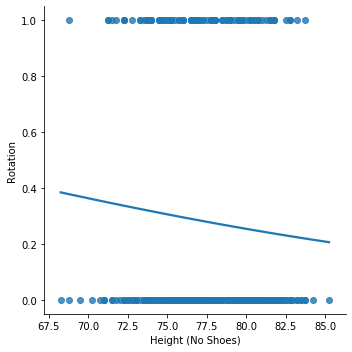

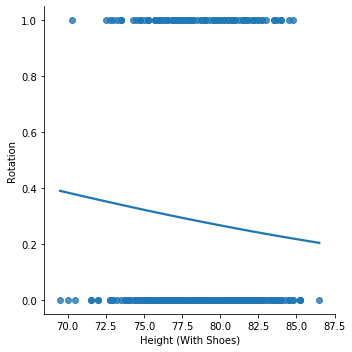

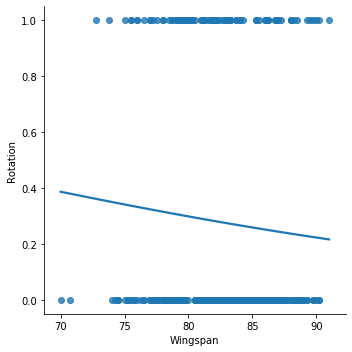

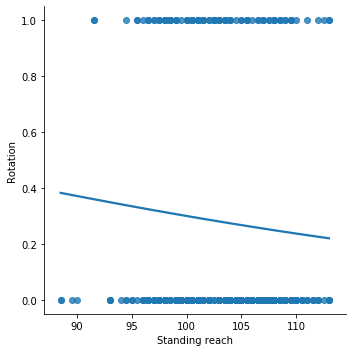

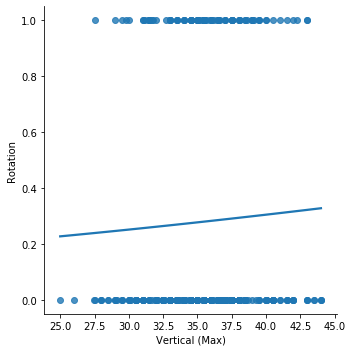

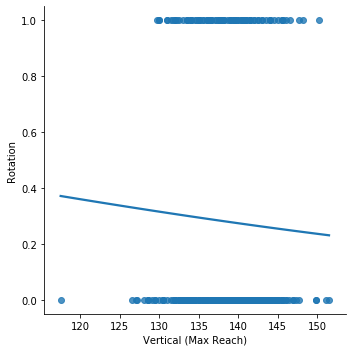

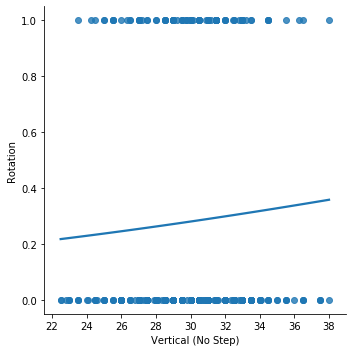

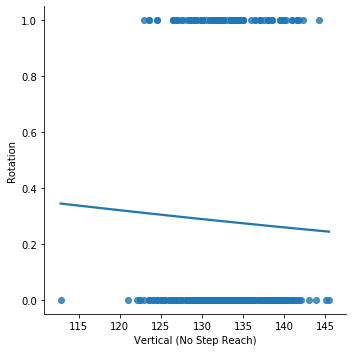

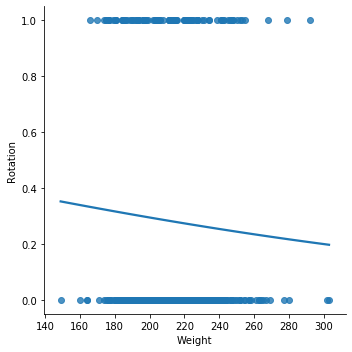

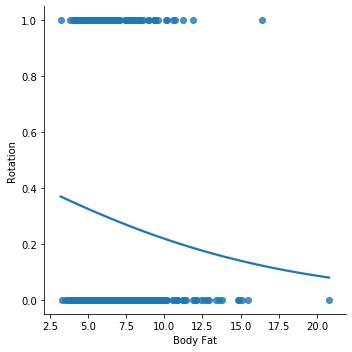

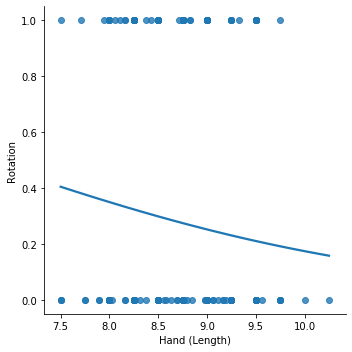

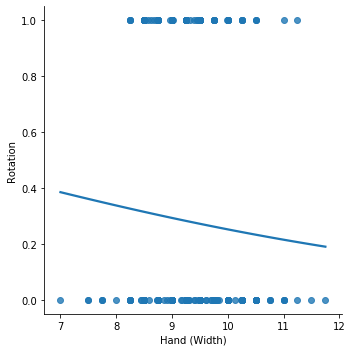

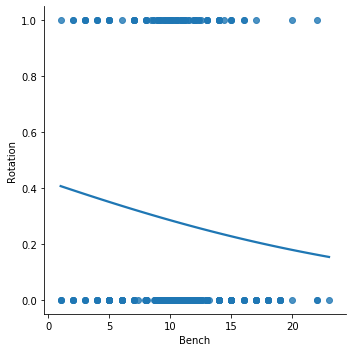

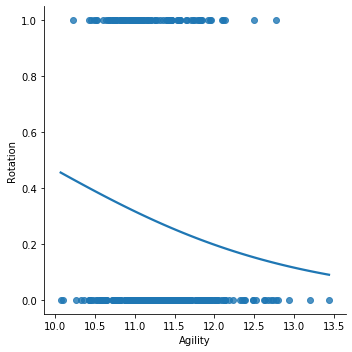

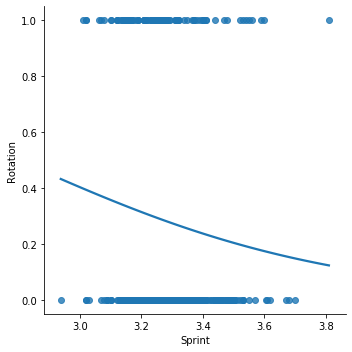

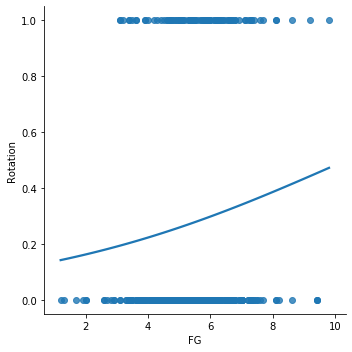

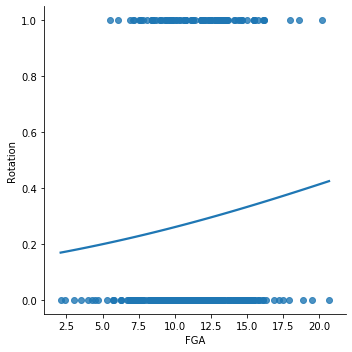

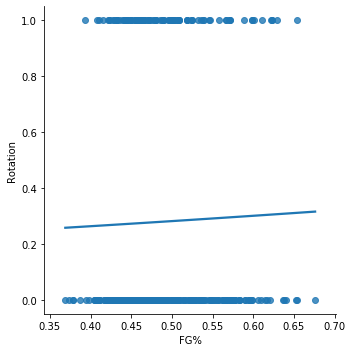

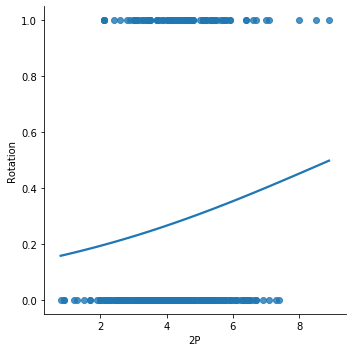

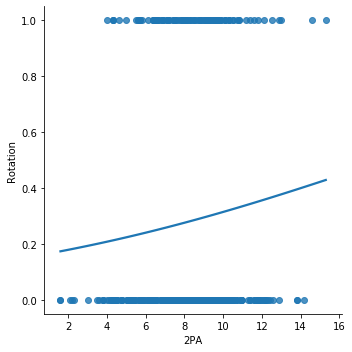

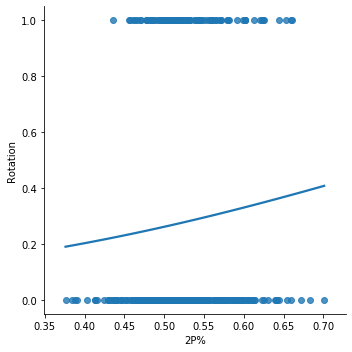

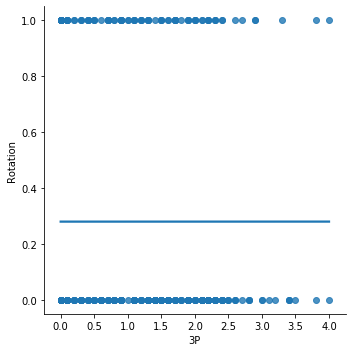

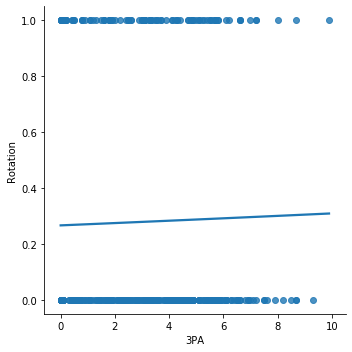

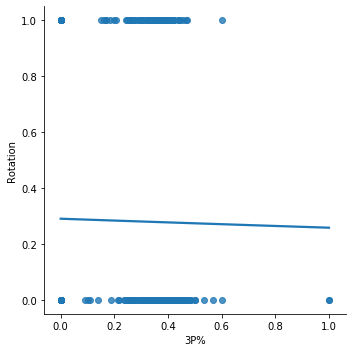

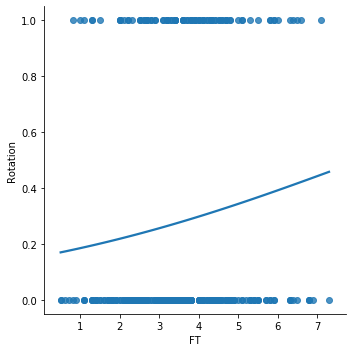

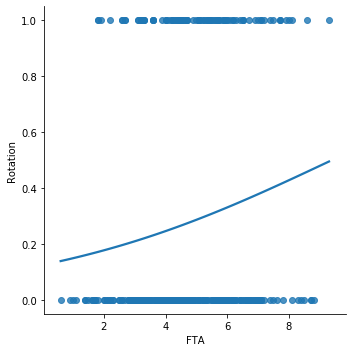

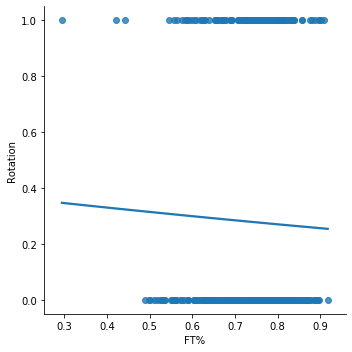

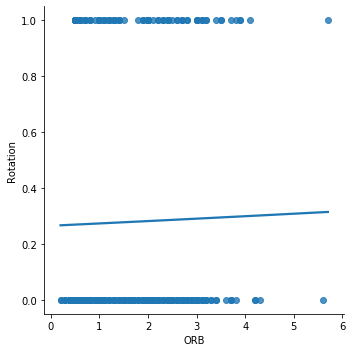

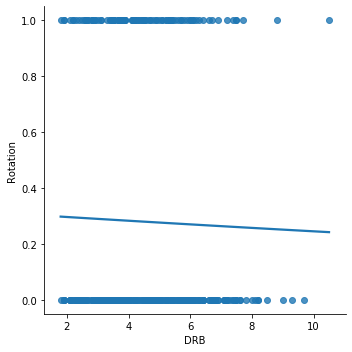

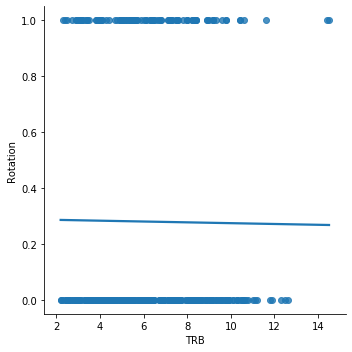

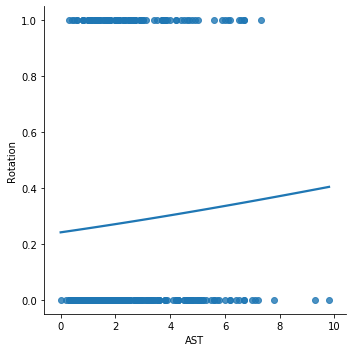

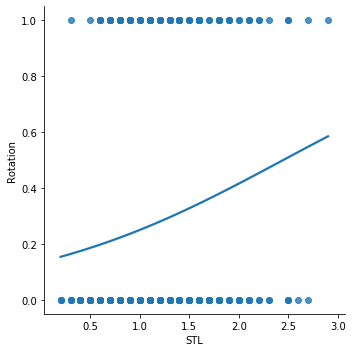

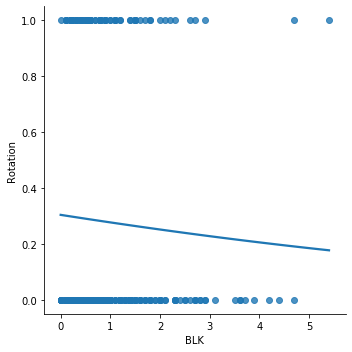

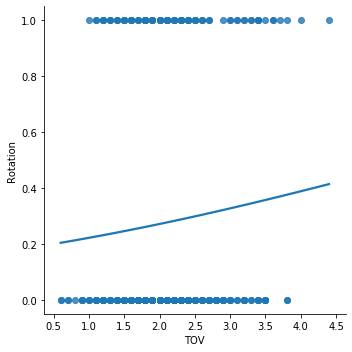

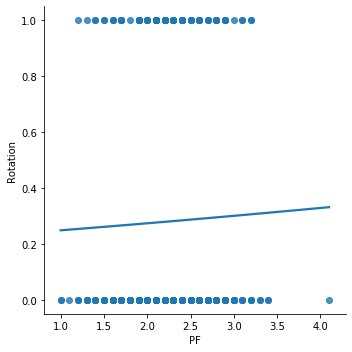

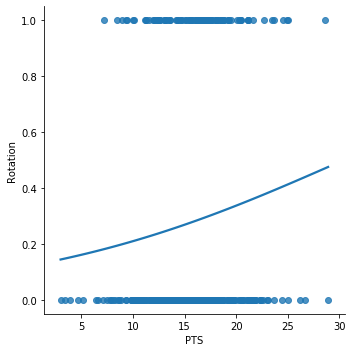

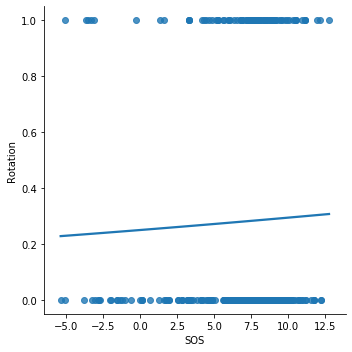

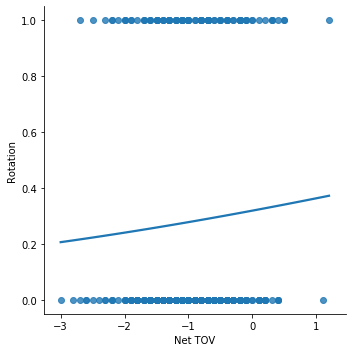

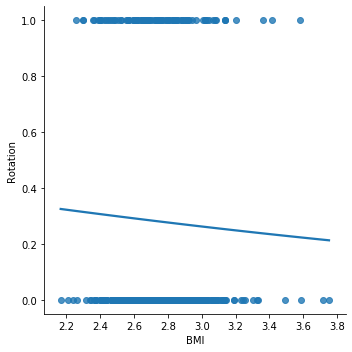

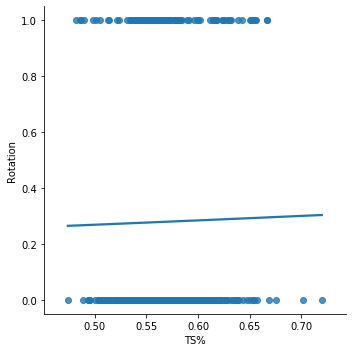

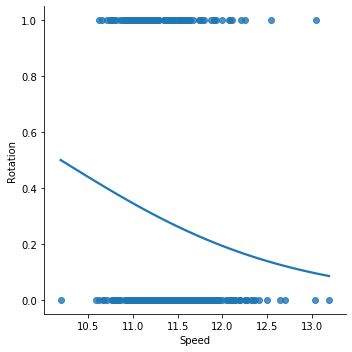

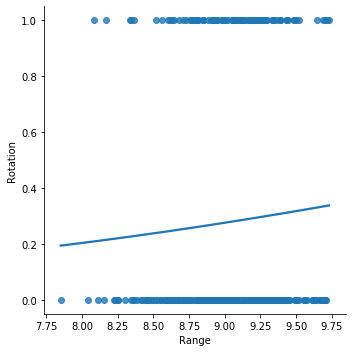

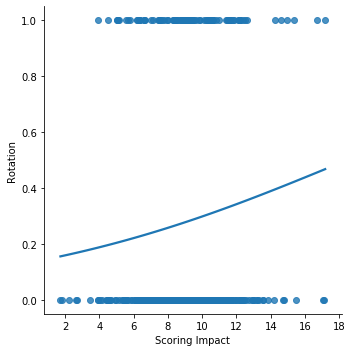

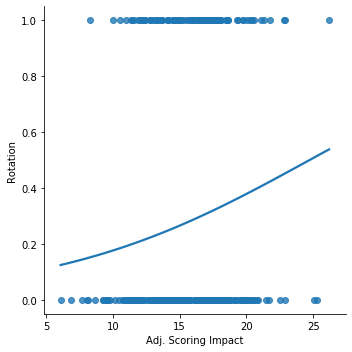

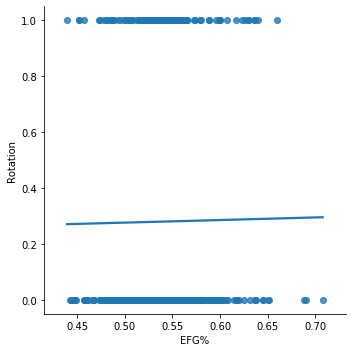

In [24]:
for feat in features:
    pp = sns.lmplot(x=feat, y='Rotation', data=draft_df, ci=None, logistic=True)

Create scatter plots to represent relationship between each feature and the y variable, Rotation

/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys

/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`

/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`

KeyError: 'Length'

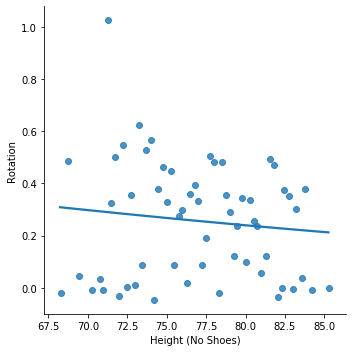

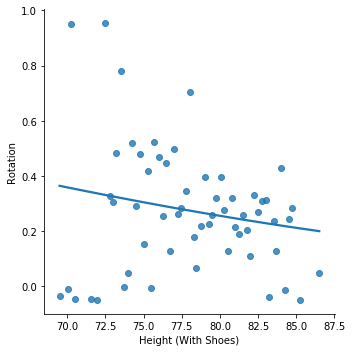

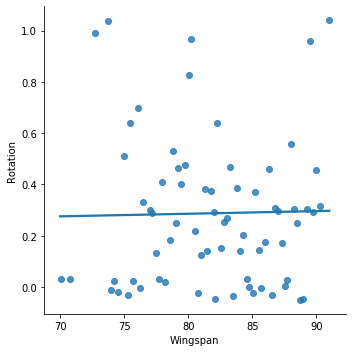

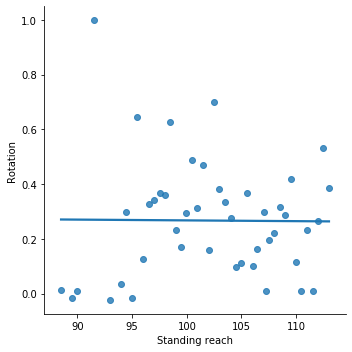

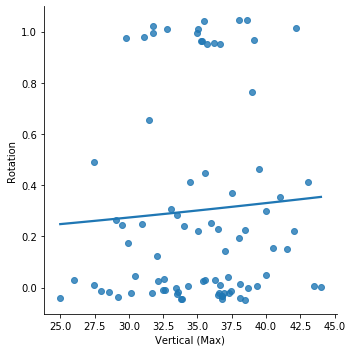

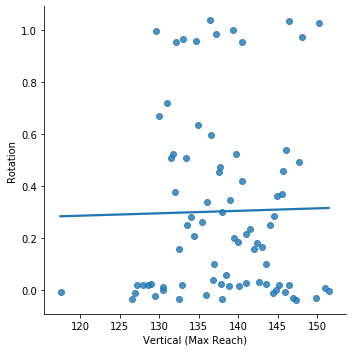

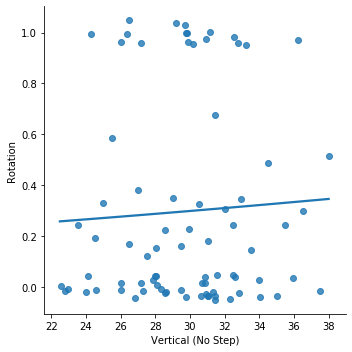

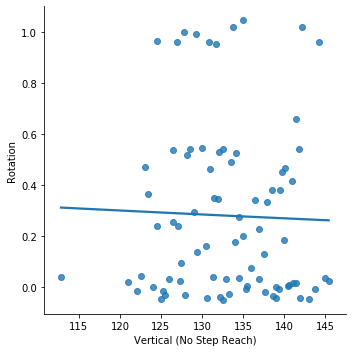

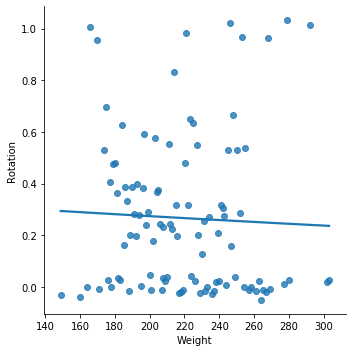

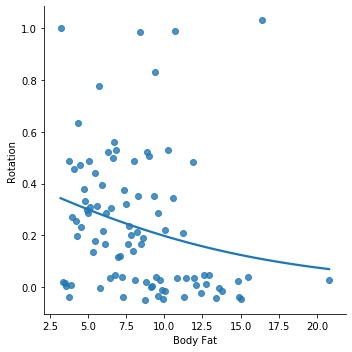

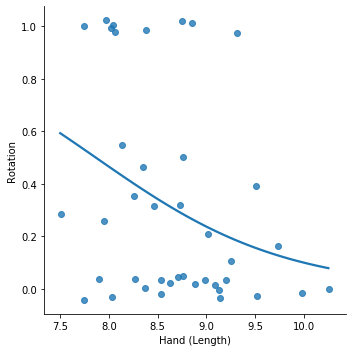

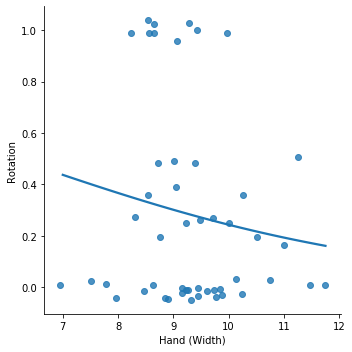

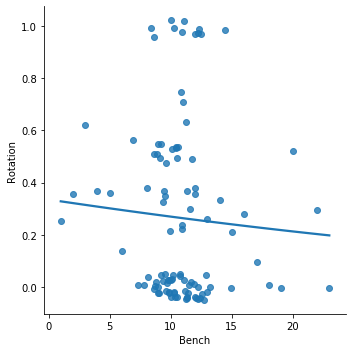

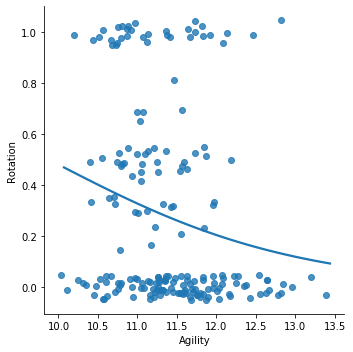

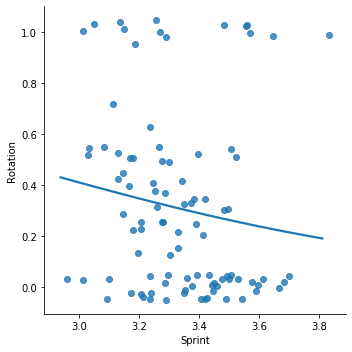

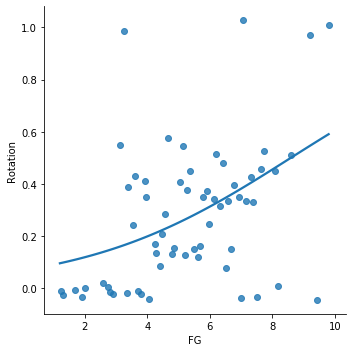

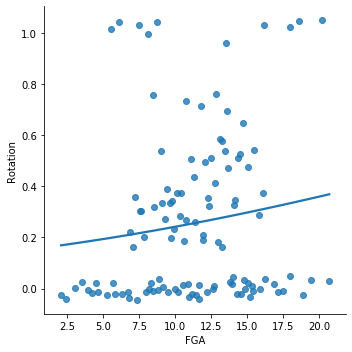

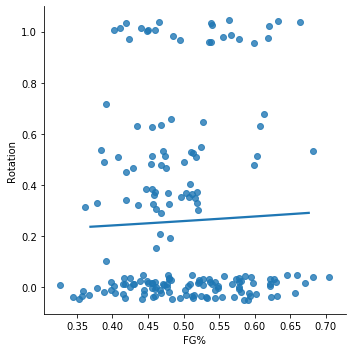

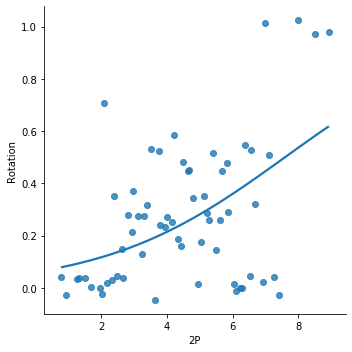

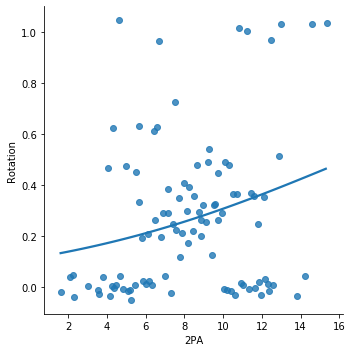

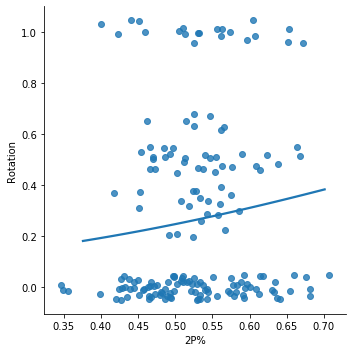

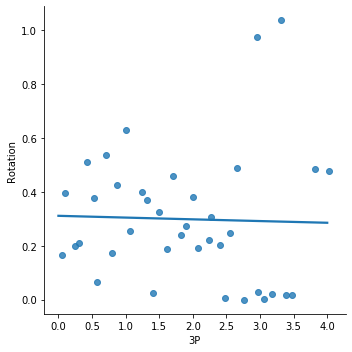

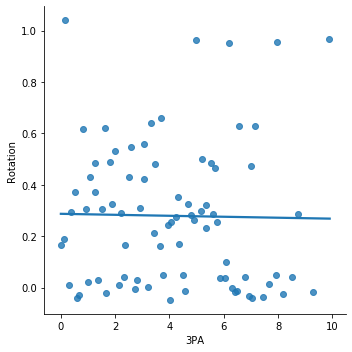

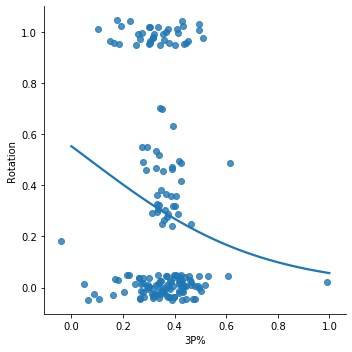

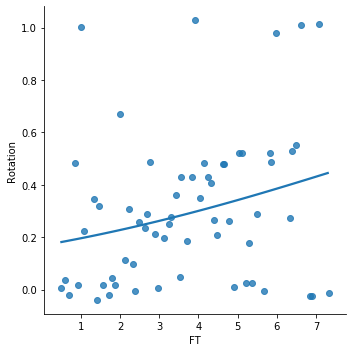

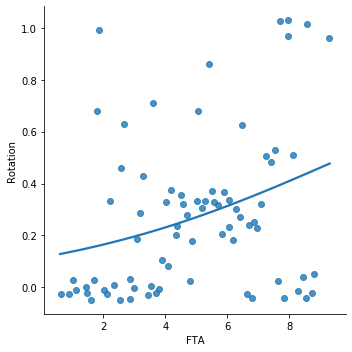

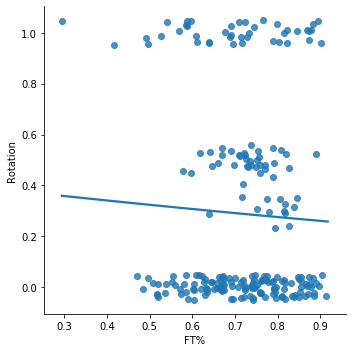

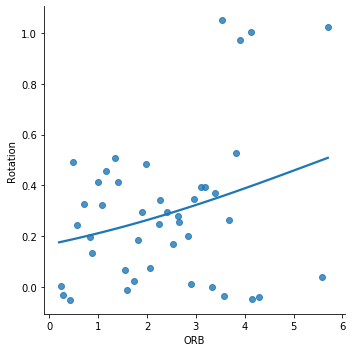

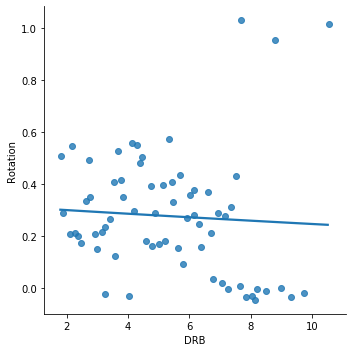

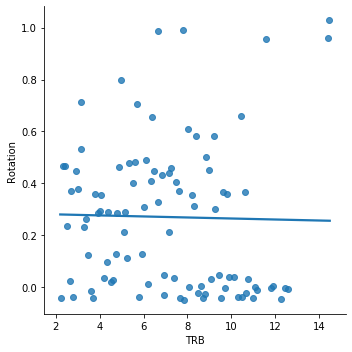

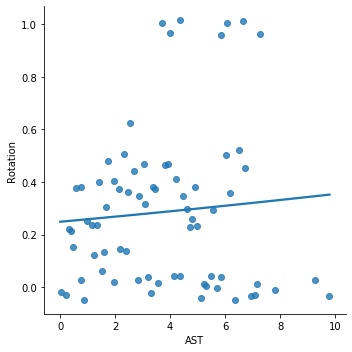

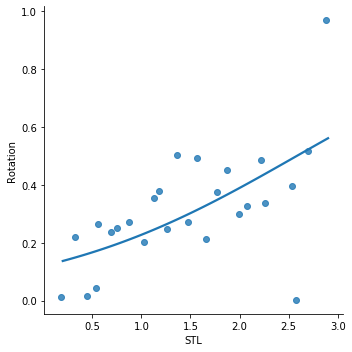

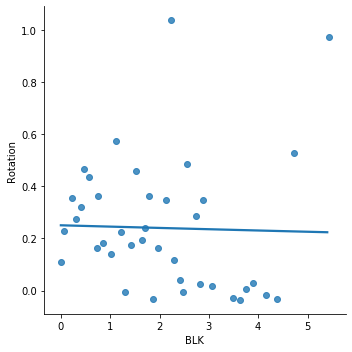

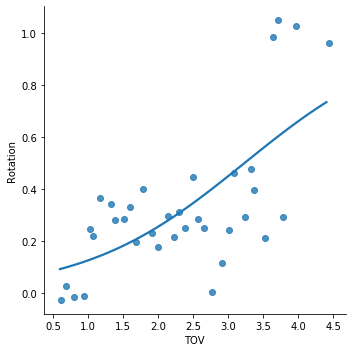

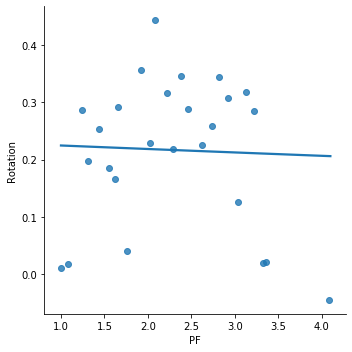

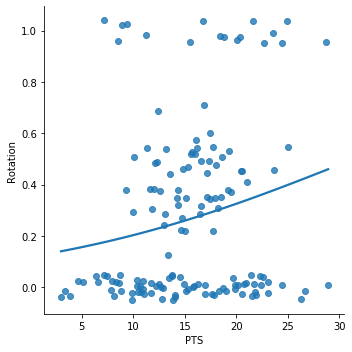

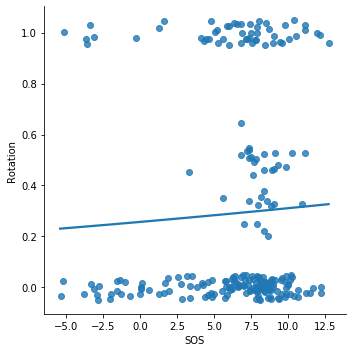

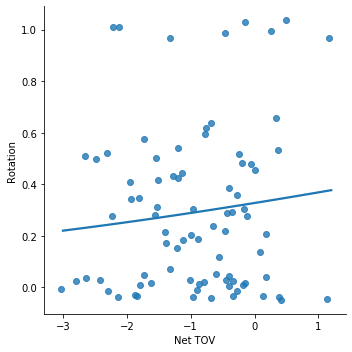

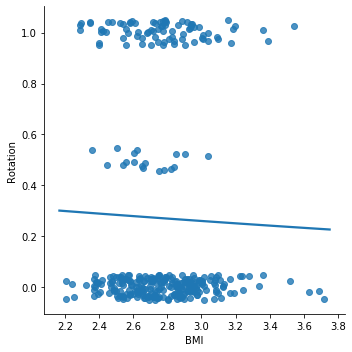

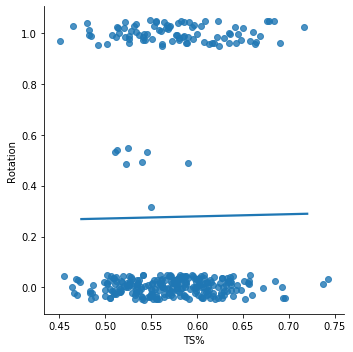

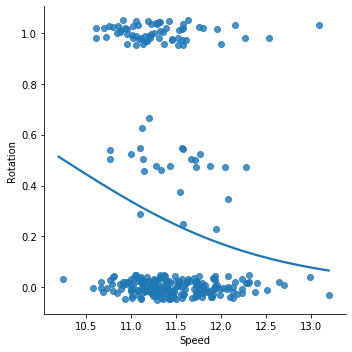

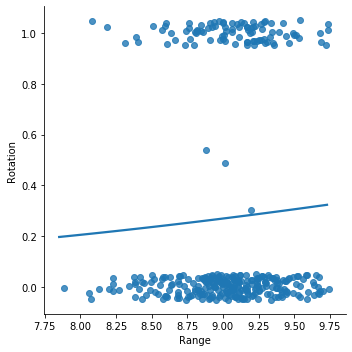

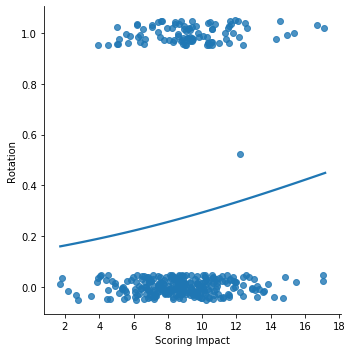

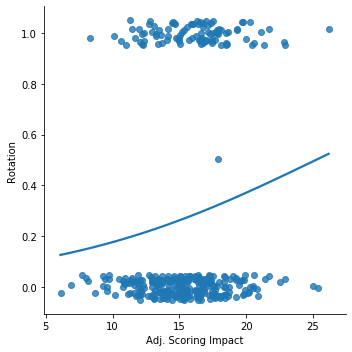

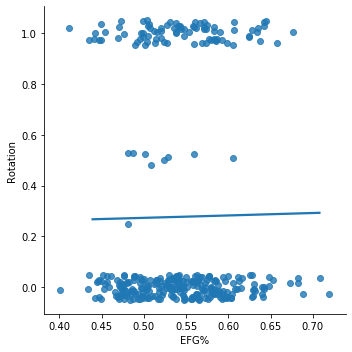

In [25]:
for feat in features:
    df_temp = draft_df.groupby(feat)[feat,'Rotation'].mean()
    pp = sns.lmplot(x=feat, y='Rotation', data=df_temp, ci=None, logistic=True, x_jitter=0.05, y_jitter=0.05)

# Modeling

Create x and y variables with corresponding columns from draft df

In [58]:
x = draft_df[['Height (With Shoes)','Vertical (Max)','Body Fat','Agility','2P','FTA','STL',
             'Speed','Adj. Scoring Impact','Arm Length','PTS','SOS']]
y = draft_df['Rotation']

Perform train test split on x and y variables

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=12)

Create dictionary of gridsearch parameters for Random Forest model

In [33]:
from sklearn.model_selection import GridSearchCV
p={'max_depth': range(3,11),
   'min_samples_leaf': range(5,15,1),}

Create and fit gridsearch for Random Forest model

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
rfc = RandomForestClassifier(random_state = 23,
                             n_estimators = 100,
                             class_weight='balanced')
grid_tree=GridSearchCV(rfc,p, cv=5, scoring='precision', verbose=1,n_jobs=-1)
grid_tree.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  3.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=23,
                            

Calculate evaluation metrics for Random Forest gridsearch

In [35]:
from sklearn import metrics
print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)
y_pred_grid = grid_tree.best_estimator_.predict(x_test)
y_pred_grid_train = grid_tree.best_estimator_.predict(x_train)
print(metrics.precision_score(y_test, y_pred_grid))
print(metrics.accuracy_score(y_test, y_pred_grid))
print(metrics.f1_score(y_test, y_pred_grid))
print(metrics.precision_score(y_train, y_pred_grid_train))
print(metrics.accuracy_score(y_train, y_pred_grid_train))
print(metrics.f1_score(y_train, y_pred_grid_train))

0.281034188034188
{'max_depth': 3, 'min_samples_leaf': 13}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=13, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=23, verbose=0,
                       warm_start=False)
0.5217391304347826
0.6703296703296703
0.4444444444444444
0.5263157894736842
0.7555555555555555
0.547945205479452


Scale x variables using standard scaler for KNN model

In [59]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_cont = ss.fit_transform(x)
x_cont = pd.DataFrame(x_cont,columns = x.columns)
x_cont

,Height (With Shoes),Vertical (Max),Body Fat,Agility,2P,FTA,STL,Speed,Adj. Scoring Impact,Arm Length,PTS,SOS
0,0.974991,0.023263,0.436093,-0.686241,3.180184,2.811781,-0.111954,-0.467888,2.047517,-1.140872,1.728824,0.015826
1,-0.192024,0.454116,-0.830459,-0.313494,-0.955972,-0.939020,2.186546,-0.637848,-0.665030,-0.384539,-0.764078,0.475171
2,-0.581029,-0.120354,-1.116455,-0.276220,0.247274,0.229262,0.079588,-0.773815,0.480523,0.871137,0.213530,0.673320
3,0.819389,-0.407589,0.558663,-0.369406,1.525722,2.442850,0.079588,-0.314924,1.642276,-0.787561,1.240019,0.457157
4,1.052792,-0.694824,-0.789603,-0.276220,0.247274,-0.570089,-0.303495,0.058987,-0.266019,0.243639,-0.348595,0.475171
...,...,...,...,...,...,...,...,...,...,...,...,...
356,-1.359039,-0.551206,-0.095042,-0.593055,0.247274,-0.939020,0.654213,-0.768150,0.975856,-0.955006,0.189090,1.534966
357,-0.347626,-0.563980,0.476950,-0.338266,-0.053538,1.090102,0.271130,-0.414084,0.612257,-0.131532,-0.153073,1.405869
358,-1.436840,0.023263,-0.299324,-0.145758,-1.557595,-0.816043,0.845755,-0.654844,-1.337632,1.862900,-1.423964,0.240995
359,0.585986,-0.438369,0.681232,0.462604,0.924099,1.213079,-0.686579,0.568621,0.451113,-0.778898,1.802144,-2.527081


Perform train test split on scaled data

In [60]:
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_cont,y,random_state=15)

Define parameter dictionary for knn gridsearch

In [54]:
p={'n_neighbors': range(1,15)}

Create and fit KNN grid search

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
grid_tree_knn=GridSearchCV(knn,p, cv=10, scoring='precision', verbose=1)
grid_tree_knn.fit(x_train_s, y_train_s)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

KeyboardInterrupt: 

Calculate evaluation metrics for KNN grid search

In [40]:
print(grid_tree_knn.best_score_)
print(grid_tree_knn.best_params_)
print(grid_tree_knn.best_estimator_)
y_pred_knn = grid_tree_knn.best_estimator_.predict(x_test_s)
y_pred_knn_train = grid_tree_knn.best_estimator_.predict(x_train_s)
print(metrics.precision_score(y_train_s, y_pred_knn_train))
print(metrics.accuracy_score(y_train_s, y_pred_knn_train))
print(metrics.f1_score(y_train_s, y_pred_knn_train))
print(metrics.precision_score(y_test_s, y_pred_knn))
print(metrics.accuracy_score(y_test_s, y_pred_knn))
print(metrics.f1_score(y_test_s, y_pred_knn))

0.20906288156288158
{'n_neighbors': 1}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
0.9722222222222222
0.9851851851851852
0.9722222222222222
0.37142857142857144
0.5824175824175825
0.40625


Create and fit logistic regression model

In [62]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train_s, y_train_s)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Calculate evaluation metrics for logistic regression model

In [63]:
y_pred_log = logreg.predict(x_test_s)
y_pred_log_train = logreg.predict(x_train_s)
print(metrics.precision_score(y_train_s, y_pred_log_train))
print(metrics.accuracy_score(y_train_s, y_pred_log_train))
print(metrics.f1_score(y_train_s, y_pred_log_train))
print(metrics.precision_score(y_test_s, y_pred_log))
print(metrics.accuracy_score(y_test_s, y_pred_log))
print(metrics.f1_score(y_test_s, y_pred_log))

0.3125
0.7111111111111111
0.11363636363636365
0.45454545454545453
0.6703296703296703
0.25000000000000006


Determine coefficients for logistic regression model

In [49]:
coef = zip(x_train.columns, logreg.coef_[0])

In [50]:
list(coef)

[('Height (With Shoes)', 0.2774856320345966),
 ('Vertical (Max)', -0.13336816804355683),
 ('Body Fat', -0.25063318322316747),
 ('Agility', -0.5426938665107718),
 ('2P', 0.4891969383868704),
 ('FTA', 0.20121215857885516),
 ('STL', 0.47598558350429376),
 ('Speed', 0.060686314211066066),
 ('Adj. Scoring Impact', 0.29357943680456816),
 ('Arm Length', -0.02056893999603639),
 ('PTS', -0.4788667675952841),
 ('SOS', 0.15243204726561468)]

In [ ]:
x_train.columns